# Imports

In [1]:
import IPython.display as ipd
import matplotlib.pyplot as plt
# % pylab inline
import os
import pandas as pd
import librosa
import glob 
import librosa.display
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from keras.callbacks import EarlyStopping

from keras import regularizers

from sklearn.preprocessing import LabelEncoder

from datetime import datetime

import os

from tqdm import tqdm

In [2]:
#list the files
#filelist = os.listdir('all_data')

from_directory_base = 'data\\'
filelist = os.listdir(from_directory_base)

files_names = []
full_path = []

for x in filelist:
    filelist2 = os.listdir(from_directory_base+"\\"+x)
    
    for y in filelist2:
        files_names.append(y)
        full_path.append(from_directory_base+x+"\\"+y)
        
print("Done")


Done


In [3]:
no_of_data = len(files_names)

In [4]:
print(no_of_data)

83


In [5]:
print(files_names)

['0-0.m4a', '0-1.m4a', '0-10.m4a', '0-11.m4a', '0-12.m4a', '0-13.m4a', '0-14.m4a', '0-15.m4a', '0-16.m4a', '0-17.m4a', '0-18.m4a', '0-19.m4a', '0-2.m4a', '0-20.m4a', '0-21.m4a', '0-22.m4a', '0-23.m4a', '0-24.m4a', '0-25.m4a', '0-26.m4a', '0-27.m4a', '0-28.m4a', '0-29.m4a', '0-3.m4a', '0-30.m4a', '0-31.m4a', '0-32.m4a', '0-33.m4a', '0-34.m4a', '0-35.m4a', '0-36.m4a', '0-37.m4a', '0-38.m4a', '0-39.m4a', '0-4.m4a', '0-40.m4a', '0-41.m4a', '0-42.m4a', '0-43.m4a', '0-44.m4a', '0-5.m4a', '0-6.m4a', '0-7.m4a', '0-8.m4a', '0-9.m4a', '1-0.m4a', '1-1.m4a', '1-10.m4a', '1-11.m4a', '1-12.m4a', '1-13.m4a', '1-14.m4a', '1-15.m4a', '1-16.m4a', '1-17.m4a', '1-18.m4a', '1-19.m4a', '1-2.m4a', '1-20.m4a', '1-21.m4a', '1-22.m4a', '1-23.m4a', '1-24.m4a', '1-25.m4a', '1-26.m4a', '1-27.m4a', '1-28.m4a', '1-29.m4a', '1-3.m4a', '1-30.m4a', '1-31.m4a', '1-32.m4a', '1-33.m4a', '1-34.m4a', '1-35.m4a', '1-36.m4a', '1-37.m4a', '1-4.m4a', '1-5.m4a', '1-6.m4a', '1-7.m4a', '1-8.m4a', '1-9.m4a']


In [6]:
filter_filelist = []

for x in files_names:
    if ".txt" not in x:
        filter_filelist.append(x)


In [7]:
filter_filelist_path = []

for x in full_path:
    if ".txt" not in x:
        filter_filelist_path.append(x)


In [8]:
print((".txt" not in "103-1240.trans.txt" ))

False


In [9]:
print(len(filter_filelist))

83


In [10]:
print(filter_filelist)

['0-0.m4a', '0-1.m4a', '0-10.m4a', '0-11.m4a', '0-12.m4a', '0-13.m4a', '0-14.m4a', '0-15.m4a', '0-16.m4a', '0-17.m4a', '0-18.m4a', '0-19.m4a', '0-2.m4a', '0-20.m4a', '0-21.m4a', '0-22.m4a', '0-23.m4a', '0-24.m4a', '0-25.m4a', '0-26.m4a', '0-27.m4a', '0-28.m4a', '0-29.m4a', '0-3.m4a', '0-30.m4a', '0-31.m4a', '0-32.m4a', '0-33.m4a', '0-34.m4a', '0-35.m4a', '0-36.m4a', '0-37.m4a', '0-38.m4a', '0-39.m4a', '0-4.m4a', '0-40.m4a', '0-41.m4a', '0-42.m4a', '0-43.m4a', '0-44.m4a', '0-5.m4a', '0-6.m4a', '0-7.m4a', '0-8.m4a', '0-9.m4a', '1-0.m4a', '1-1.m4a', '1-10.m4a', '1-11.m4a', '1-12.m4a', '1-13.m4a', '1-14.m4a', '1-15.m4a', '1-16.m4a', '1-17.m4a', '1-18.m4a', '1-19.m4a', '1-2.m4a', '1-20.m4a', '1-21.m4a', '1-22.m4a', '1-23.m4a', '1-24.m4a', '1-25.m4a', '1-26.m4a', '1-27.m4a', '1-28.m4a', '1-29.m4a', '1-3.m4a', '1-30.m4a', '1-31.m4a', '1-32.m4a', '1-33.m4a', '1-34.m4a', '1-35.m4a', '1-36.m4a', '1-37.m4a', '1-4.m4a', '1-5.m4a', '1-6.m4a', '1-7.m4a', '1-8.m4a', '1-9.m4a']


In [11]:
X = []
Y = []

for data in filter_filelist:
    name = data.split(sep="-")
    X.append(data)
    Y.append(name[0])
    

In [12]:
print(X)

['0-0.m4a', '0-1.m4a', '0-10.m4a', '0-11.m4a', '0-12.m4a', '0-13.m4a', '0-14.m4a', '0-15.m4a', '0-16.m4a', '0-17.m4a', '0-18.m4a', '0-19.m4a', '0-2.m4a', '0-20.m4a', '0-21.m4a', '0-22.m4a', '0-23.m4a', '0-24.m4a', '0-25.m4a', '0-26.m4a', '0-27.m4a', '0-28.m4a', '0-29.m4a', '0-3.m4a', '0-30.m4a', '0-31.m4a', '0-32.m4a', '0-33.m4a', '0-34.m4a', '0-35.m4a', '0-36.m4a', '0-37.m4a', '0-38.m4a', '0-39.m4a', '0-4.m4a', '0-40.m4a', '0-41.m4a', '0-42.m4a', '0-43.m4a', '0-44.m4a', '0-5.m4a', '0-6.m4a', '0-7.m4a', '0-8.m4a', '0-9.m4a', '1-0.m4a', '1-1.m4a', '1-10.m4a', '1-11.m4a', '1-12.m4a', '1-13.m4a', '1-14.m4a', '1-15.m4a', '1-16.m4a', '1-17.m4a', '1-18.m4a', '1-19.m4a', '1-2.m4a', '1-20.m4a', '1-21.m4a', '1-22.m4a', '1-23.m4a', '1-24.m4a', '1-25.m4a', '1-26.m4a', '1-27.m4a', '1-28.m4a', '1-29.m4a', '1-3.m4a', '1-30.m4a', '1-31.m4a', '1-32.m4a', '1-33.m4a', '1-34.m4a', '1-35.m4a', '1-36.m4a', '1-37.m4a', '1-4.m4a', '1-5.m4a', '1-6.m4a', '1-7.m4a', '1-8.m4a', '1-9.m4a']


In [13]:
print(Y)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']




We are going to do an split of train, validation and test with 70% train, 20% validation and 10% for test. We check that the randomized splits have balanced classes


In [14]:
print(full_path)

['data\\0\\0-0.m4a', 'data\\0\\0-1.m4a', 'data\\0\\0-10.m4a', 'data\\0\\0-11.m4a', 'data\\0\\0-12.m4a', 'data\\0\\0-13.m4a', 'data\\0\\0-14.m4a', 'data\\0\\0-15.m4a', 'data\\0\\0-16.m4a', 'data\\0\\0-17.m4a', 'data\\0\\0-18.m4a', 'data\\0\\0-19.m4a', 'data\\0\\0-2.m4a', 'data\\0\\0-20.m4a', 'data\\0\\0-21.m4a', 'data\\0\\0-22.m4a', 'data\\0\\0-23.m4a', 'data\\0\\0-24.m4a', 'data\\0\\0-25.m4a', 'data\\0\\0-26.m4a', 'data\\0\\0-27.m4a', 'data\\0\\0-28.m4a', 'data\\0\\0-29.m4a', 'data\\0\\0-3.m4a', 'data\\0\\0-30.m4a', 'data\\0\\0-31.m4a', 'data\\0\\0-32.m4a', 'data\\0\\0-33.m4a', 'data\\0\\0-34.m4a', 'data\\0\\0-35.m4a', 'data\\0\\0-36.m4a', 'data\\0\\0-37.m4a', 'data\\0\\0-38.m4a', 'data\\0\\0-39.m4a', 'data\\0\\0-4.m4a', 'data\\0\\0-40.m4a', 'data\\0\\0-41.m4a', 'data\\0\\0-42.m4a', 'data\\0\\0-43.m4a', 'data\\0\\0-44.m4a', 'data\\0\\0-5.m4a', 'data\\0\\0-6.m4a', 'data\\0\\0-7.m4a', 'data\\0\\0-8.m4a', 'data\\0\\0-9.m4a', 'data\\1\\1-0.m4a', 'data\\1\\1-1.m4a', 'data\\1\\1-10.m4a', 'da

Function to extract the features and label for each sound file by iterating through every row of the dataframe

In [15]:
# Although this function was modified and many parameteres were explored with, most of it
# came from Source 8 (sources in the READ.ME)

def extract_features(full_path_name):
    
    # Sets the name to be the path to where the file is in my computer
    #file_name = os.path.join(os.path.abspath('all_data')+'/'+str(files.file))
    
    file_name = os.path.join(full_path_name)
    
    # Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    
    # Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)

    # Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))

    # Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

    # Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

    # Computes spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)

    # Computes the tonal centroid features (tonnetz)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
        
    
    # We add also the classes of each file as a label at the end
    #label = files.label

    return mfccs, chroma, mel, contrast, tonnetz

In [16]:
# Code to start the timer to see how long it takes to extract the features
startTime = datetime.now()
# Applying the function to the train data by accessing each row of the dataframe
#features_label = df.apply(extract_features, axis=1)

features_label = []

    
for path in tqdm(filter_filelist_path):
    feature = extract_features(full_path_name=path)
    features_label.append(feature)
    

# Code to see how long it took
print(datetime.now() - startTime)
np.save('features_label_new', features_label)

  0%|                                                                                           | 0/83 [00:00<?, ?it/s]c:\users\ai\appdata\local\programs\python\python38\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
  1%|█                                                                                  | 1/83 [00:03<04:09,  3.04s/it]c:\users\ai\appdata\local\programs\python\python38\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 52%|██████████████████████████████████████████▍                                       | 43/83 [00:39<00:34,  1.17it/s]c:\users\ai\appdata\local\programs\python\python38\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=857
  warnings.warn(
 71%|██████████████

0:01:09.320159



c:\users\ai\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [17]:


# The next code loads the saved numpy array of our extracted features
features_label = np.load('features_label_new.npy', allow_pickle=True)



In [18]:
# We create an empty list where we will concatenate all the features into one long feature
# for each file to feed into our neural network 

features = []
for i in range(0, len(features_label)):
    features.append(np.concatenate((features_label[i][0], features_label[i][1], 
                features_label[i][2], features_label[i][3],
                features_label[i][4]), axis=0))

In [19]:
n_samples =len(features)
print(n_samples)

83


In [20]:
d = {'file':X,'speaker':Y,'features':features}

df = pd.DataFrame(d)

In [21]:
df.head()

,file,speaker,features
0,0-0.m4a,0,"[-306.3504333496094, 112.0266342163086, -38.71..."
1,0-1.m4a,0,"[-307.7640686035156, 105.328857421875, -38.131..."
2,0-10.m4a,0,"[-318.2536926269531, 94.04342651367188, -32.49..."
3,0-11.m4a,0,"[-331.1217956542969, 105.3504638671875, -34.66..."
4,0-12.m4a,0,"[-300.43603515625, 104.2455825805664, -39.4971..."


In [22]:
df = df.sample(frac=1)

In [23]:
df.head()

,file,speaker,features
29,0-35.m4a,0,"[-399.6650085449219, 153.88607788085938, 19.63..."
82,1-9.m4a,1,"[-393.195068359375, 153.51170349121094, -29.77..."
52,1-15.m4a,1,"[-271.51055908203125, 122.39016723632812, 0.99..."
53,1-16.m4a,1,"[-272.6347961425781, 129.2206573486328, -3.243..."
8,0-16.m4a,0,"[-297.35028076171875, 97.99595642089844, -28.3..."


In [24]:
print(len(df))

83


In [25]:
df_train = df[:70]
#df_val = df[19:29]
df_test = df[70:82]

In [26]:
X = df['features']
X = np.stack(X)

Y = df['speaker']

# Hot encoding y
lb = LabelEncoder()
Y = to_categorical(lb.fit_transform(Y))


X_train = X[:70]
#X_val = X[19:29]
X_test = X[70:82]

Y_train = Y[:70]
#Y_val = Y[19:29]
Y_test = Y[70:82]

In [27]:
print(X_test)

[[-3.79864349e+02  1.37790497e+02 -3.04550667e+01 ... -7.96418973e-02
   5.55635412e-02 -1.61360597e-02]
 [-3.16094238e+02  9.57059326e+01 -3.13757305e+01 ... -3.14166409e-02
   1.13607555e-02  1.13174736e-02]
 [-2.94963654e+02  9.67057495e+01 -2.74424934e+01 ...  2.89970132e-02
  -3.46826622e-03 -4.28168345e-03]
 ...
 [-3.63994751e+02  1.30464676e+02 -1.44263029e+00 ... -1.22169237e-01
  -6.60771657e-04 -7.67687423e-02]
 [-3.76931000e+02  1.44995239e+02 -3.31140785e+01 ... -3.18272703e-02
   2.59106344e-02  2.52954613e-02]
 [-3.15799133e+02  1.03779419e+02 -3.15389767e+01 ... -5.81052555e-03
  -2.75797885e-03  6.66220682e-03]]


In [28]:
df_test.head()

,file,speaker,features
68,1-3.m4a,1,"[-379.8643493652344, 137.79049682617188, -30.4..."
23,0-3.m4a,0,"[-316.09423828125, 95.7059326171875, -31.37573..."
11,0-19.m4a,0,"[-294.9636535644531, 96.70574951171875, -27.44..."
37,0-42.m4a,0,"[-205.42398071289062, 142.49620056152344, -36...."
14,0-21.m4a,0,"[-365.93719482421875, 133.43161010742188, -5.9..."


In [29]:
df_test.head()

,file,speaker,features
68,1-3.m4a,1,"[-379.8643493652344, 137.79049682617188, -30.4..."
23,0-3.m4a,0,"[-316.09423828125, 95.7059326171875, -31.37573..."
11,0-19.m4a,0,"[-294.9636535644531, 96.70574951171875, -27.44..."
37,0-42.m4a,0,"[-205.42398071289062, 142.49620056152344, -36...."
14,0-21.m4a,0,"[-365.93719482421875, 133.43161010742188, -5.9..."


In [30]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
#X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [31]:
print(X_test)

[[-1.20851412  0.58766218 -0.33071309 ... -0.90322561  1.64546525
  -0.60656183]
 [-0.32591109 -0.68771228 -0.37555632 ... -0.20072739  0.30925603
   0.03637931]
 [-0.03345562 -0.65741279 -0.18397822 ...  0.67931945 -0.13901155
  -0.32894124]
 ...
 [-0.98887274  0.36565287  1.08240981 ... -1.52272217 -0.05414359
  -2.02653373]
 [-1.16791543  0.8060022  -0.46022688 ... -0.20670904  0.74908537
   0.36373328]
 [-0.32182672 -0.44304494 -0.38350763 ...  0.17227737 -0.11754022
  -0.07264355]]


In [32]:
# Build a simple dense model with early stopping with softmax for categorical classification
# We have 115 classes 

model = Sequential()

model.add(Dense(193, input_shape=(193,), activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))  

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))    

model.add(Dense(2, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [33]:
# fitting the model with the train data and validation with the validation data
# we used early stop with patience 100 because we did not want to use early stop
# I leave the early stop regularization code in case anyone wants to use it

history = model.fit(X_train, Y_train, batch_size=1, epochs=1000, 
                    validation_data=(X_test, Y_test),
                    callbacks=[early_stop])

Epoch 1/1000
70/70 [==============================] - 0s 4ms/step - loss: 0.6183 - accuracy: 0.7857 - val_loss: 0.4816 - val_accuracy: 0.8333
Epoch 2/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.1234 - accuracy: 0.9571 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 3/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 0.9714 - val_loss: 0.0299 - val_accuracy: 1.0000
Epoch 4/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.2179 - val_accuracy: 0.9167
Epoch 5/1000
70/70 [==============================] - 0s 924us/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 0.7438 - val_accuracy: 0.9167
Epoch 6/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3299 - val_accuracy: 0.9167
Epoch 7/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.0938 - val_accuracy: 0.9167
Epoc

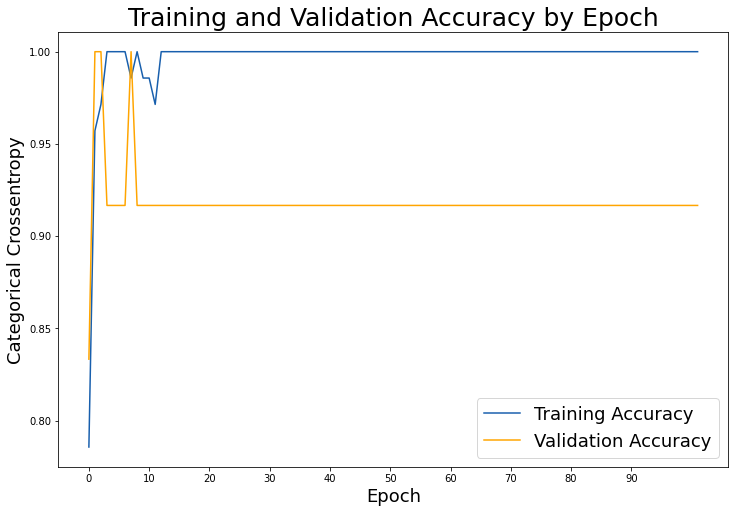

In [34]:
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,10))

plt.legend(fontsize = 18);

In [35]:
# We get our predictions from the test data
preds = model.predict_classes(X_test)
# We transform back our predictions to the speakers ids
preds = lb.inverse_transform(preds)
print(preds)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
['1' '0' '0' '1' '0' '0' '1' '0' '0' '0' '1' '0']


In [36]:
for x in df_test['speaker']:
    print(x)

1
0
0
0
0
0
1
0
0
0
1
0


In [37]:
# We get our predictions from the test data
preds = model.predict_classes(X_test)
# We transform back our predictions to the speakers ids
preds = lb.inverse_transform(preds)
df_test['preds'] = preds
df_test.head()

<ipython-input-37-688a276dff93>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['preds'] = preds


,file,speaker,features,preds
68,1-3.m4a,1,"[-379.8643493652344, 137.79049682617188, -30.4...",1
23,0-3.m4a,0,"[-316.09423828125, 95.7059326171875, -31.37573...",0
11,0-19.m4a,0,"[-294.9636535644531, 96.70574951171875, -27.44...",0
37,0-42.m4a,0,"[-205.42398071289062, 142.49620056152344, -36....",1
14,0-21.m4a,0,"[-365.93719482421875, 133.43161010742188, -5.9...",0


## Testing one input @ time

In [38]:
single_test = X_test[0]
single_test = single_test.reshape(1,-1)
print(single_test)
# We get our predictions from the test data
pred = model.predict_classes(single_test)
# We transform back our predictions to the speakers ids
pred = lb.inverse_transform(pred)
print(pred)

[[-1.20851412  0.58766218 -0.33071309  0.56109366  0.53725963 -0.01016024
   0.48598305  1.60918176  0.21657698  1.35186608 -0.77689803  0.84569826
  -0.283048    0.66583789 -1.00027128  0.18103661  0.87765224 -0.33293769
   0.48668906  0.46718562  1.29142855  0.94342003  1.02995041 -0.02035887
   1.17702768  0.46396951  0.71198312  0.47216732 -0.17869285  0.7896322
   0.59617677  0.15695754  0.45047608  0.4380712   0.60364706  0.05900817
   0.76557518  0.64121699 -0.33487294 -0.49743745  0.87595749  1.10138022
   1.10612395  0.91036135  0.93902909  1.15113477  0.99134156  0.83243503
   1.13898143  1.22478897  2.05494158  1.15943401 -0.3932996  -0.50445795
  -0.47891887 -0.6194793  -0.75577091 -0.82785271 -1.07813415 -0.60792989
  -0.73767228 -0.57124124 -0.73218028 -0.62787365 -0.65813524 -0.54367842
  -0.50316044 -0.65788787 -0.64773948 -0.76414119 -0.56234433 -0.62926485
  -0.70081613 -0.90151129 -0.84160182 -0.4008764  -0.41497495 -0.76113128
  -0.76635001 -0.87337698 -0.88066853 -

# code from reading the voice clip to the prediction

In [45]:

# The next code loads the saved numpy array of our extracted features
features_label = np.load('features_label_new.npy', allow_pickle=True)

features = []
for i in range(0, len(features_label)):
    features.append(np.concatenate((features_label[i][0], features_label[i][1], 
                features_label[i][2], features_label[i][3],
                features_label[i][4]), axis=0))



# C:\\Users\\AI\\Documents\\Sound recordings\\recording.m4a -> 1
# C:\\Users\\AI\\Desktop\\Voice Classification\\Data\\LibriSpeech\\train-clean-100\\298\\126790\\298-126790-0005.flac -> 0
# D:\rec\data\0\0-0.m4a
#full_path_name = "C:\\Users\\AI\\Documents\\Sound recordings\\recording (6).m4a"
full_path_name = "C:\\Users\\AI\\Desktop\\Voice Classification\\Data\\LibriSpeech\\train-clean-100\\298\\126790\\298-126790-0000.flac"
feature1 = extract_features(full_path_name)
features1 = []
features1.append(np.concatenate((feature1[0], feature1[1], 
                feature1[2], feature1[3],
                feature1[4]), axis=0))

ss = StandardScaler()
ss.fit(features)
x_norm = ss.transform(features1)

# We get our predictions
pred = model.predict_classes(x_norm)
pred = lb.inverse_transform(pred)
print(pred)

c:\users\ai\appdata\local\programs\python\python38\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


['0']


In [46]:
# We get our predictions
pred = model.predict(x_norm)
#pred = lb.inverse_transform(pred)
print(pred)

[[1.000000e+00 5.368126e-08]]
